In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from control import ctrb

### Laboratorio 3

**Integrantes**: 

**Maximiliano S. Lioi**

**Isidora Reyes Zenteno**

### Pregunta 1

Estudiar la controlabilidad del sistema (use el método que le acomode) y la existencia de un control
que lleve la partícula al origen en tiempo mínimo.

La dinámica del sistema escrita en forma matricial queda:

$$\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{v_x} \\
\dot{v_y} \\
\dot{z}
\end{bmatrix}
=
\begin{bmatrix}
v_x \\
v_y \\
x+u \\
y+v \\
x+y
\end{bmatrix}
$$

Equivalentemente

$$\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{v_x} \\
\dot{v_y} \\
\dot{z}
\end{bmatrix}
= \begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 0
\end{bmatrix} \vec{X} + \begin{bmatrix}
0 & 0 \\
0 & 0 \\
1 & 0 \\
0 & 1 \\
0 & 0
\end{bmatrix} \vec{U}$$

In [2]:
# Definir matrices A y B de la dinámica del sistema

A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0,0], [0,0], [1,0], [0,1], [0,0]])

In [3]:
# Definir matriz de Kalman
Kalman = ctrb(A,B)
print(Kalman)

[[0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]]


In [4]:
# Observar rango de Kalman
rg_Kalman = np.linalg.matrix_rank(Kalman)
print('El rango de la Matriz de Kalman es:', rg_Kalman)

El rango de la Matriz de Kalman es: 5


Verificamos que el sistema es controlable, en vista que la matriz de Kalman asociada al sistema es de rango completo, por lo demás, la existencia de un control que lleva el sistema al origen en tiempo mínimo se tiene de los siguientes puntos:

- La dinámica es de la forma $\dot{X} = AX+BU$ sin ruido $r(\cdot)$ y entonces sabemos que si el sistema es controlable, equivale a que el sistema es controlable a cero.

- El problema de tiempo mínimo al cero desde $x_0$ $(P_{x_0 0})$ $\min_{u(\cdot)} T ; x(T, u(\cdot), x_0) = 0$ es factible por el punto anterior.

Por teoremas vistos en clase, si el problema $(P_{x0 0})$ es factible, entonces existe un control óptimo para el problema, es decir, el problema tiene solución

### Pregunta 2


Utilizando la formula de discretización de Euler, como $\dot{X} = AX + BU$, para $X(0)= 0$ aproximamos la solución a través de pequeños cambios en el tiempo, puesto que la derivada es la mejor aproximación lineal de la función entorno a un punto.

Se tiene entonces que para una discretización de $N$ puntos, la discretización de la ecuación diferencial viene por:

$$X_{i+1} = X_{i} + \Delta t (Ax_{i} + Bu_{i}) \ \forall i \in \{0,1, ... , N-2\}$$

donde $\Delta t = \frac{t_f}{N-1}$

Consideramos el siguiente código para resolver dados control $U$ y dato inicial $X(0) = X_0$ y $t_f$ fijo

In [5]:
# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0,0], [0,0], [1,0], [0,1], [0,0]])

# Condiciones iniciales
def U_0(t):
    return np.array([0,0])

def U_cte(t):
    return np.array([4,-10])

# Datos
N = 100
t_f = 10
X_0 = np.array([1,1,0,0,0]) # [x,y,v_x,v_y,z]

# Discretizamos el tiempo
t = np.linspace(0, t_f, N)
X = np.zeros((5, N))

# Imponemos condicion inicial
X[:,0] = X_0

# Definir Método de Euler
def Euler(X_0, U, t_f):
    # Condiciones iniciales
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i]) + np.dot(B, U(delta_t * i)))
    return X

### Pregunta 3

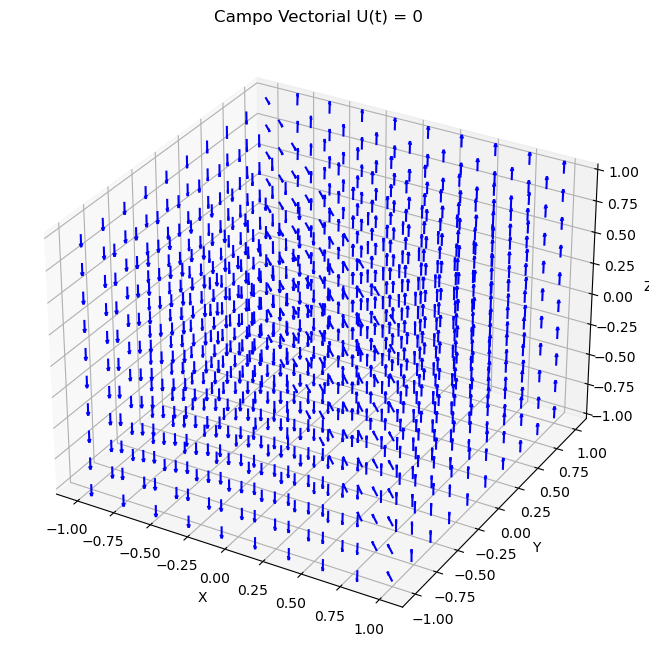

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Definir condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # [x, y, v_x, v_y, z]

# Discretización del tiempo
N = 100
t_f = 1
t = np.linspace(0, t_f, N)

# Función que calcula las diferencias entre la solución en dos puntos cercanos normalizada (campo vectorial)
def calculate_vector_field(X, i, j):
    delta_t = t[j] - t[i]
    return (X[:, j] - X[:, i]) / delta_t

# Discretización del cubo [-1, 1]^3
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)
X_grid, Y_grid, Z_grid = np.meshgrid(x, y, z)

# Inicializar vectores de dirección en cada punto de la cuadrícula
Ux = np.zeros(X_grid.shape)
Uy = np.zeros(Y_grid.shape)
Uz = np.zeros(Z_grid.shape)

# Calcular el campo vectorial en la cuadrícula para el control U = 0
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            X = Euler(np.array([x[i], y[j], 0, 0, z[k]]), U_0, t_f)
            diff = calculate_vector_field(X, 0, 3)
            Ux[i, j, k] = diff[0]
            Uy[i, j, k] = diff[1]
            Uz[i, j, k] = diff[4]

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el campo vectorial
ax.quiver(X_grid, Y_grid, Z_grid, Ux, Uy, Uz, length=0.1, normalize=True, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo Vectorial U(t) = 0')
plt.show()

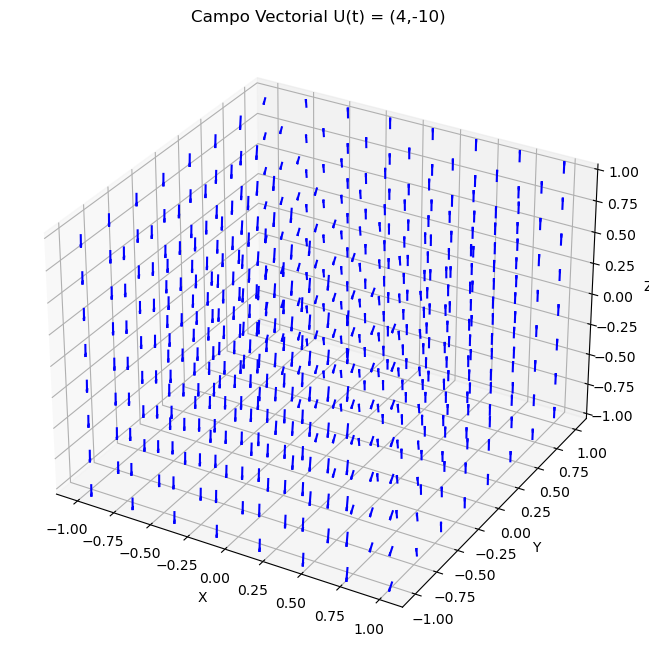

In [7]:
# Crear una cuadrícula en el cubo [-1, 1]^3
x = np.linspace(-1, 1, 8)
y = np.linspace(-1, 1, 8)
z = np.linspace(-1, 1, 8)
X_grid, Y_grid, Z_grid = np.meshgrid(x, y, z)

# Inicializar vectores de dirección en cada punto de la cuadrícula
Ux = np.zeros(X_grid.shape)
Uy = np.zeros(Y_grid.shape)
Uz = np.zeros(Z_grid.shape)

# Calcular el campo vectorial en la cuadrícula para el control U = (4,8) constante
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            X = Euler(np.array([x[i], y[j], 0, 0, z[k]]), U_cte, t_f)
            diff = calculate_vector_field(X, 0, 3)
            Ux[i, j, k] = diff[0]
            Uy[i, j, k] = diff[1]
            Uz[i, j, k] = diff[4]

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el campo vectorial
ax.quiver(X_grid, Y_grid, Z_grid, Ux, Uy, Uz, length=0.1, normalize=True, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo Vectorial U(t) = (4,-10)')
plt.show()

### Pregunta 4

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Definir condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # [x, y, v_x, v_y, z]

# Discretización del tiempo
N = 100
t_f = 1
t = np.linspace(0, t_f, N)

# Función para trazar una trayectoria en 3D
def plot_trajectory(ax, X, label):
    # X[0,:] = x(t) ; X[1, :] = y(t) ; X[4, :] = z(t)
    ax.plot(X[0, :], X[1, :], X[4, :], label=label) # (x(t),y(t),z(t))
    ax.scatter(X[0, 0], X[1, 0], X[4, 0], color='green', label='Inicio') # Tiempo inicial
    ax.scatter(X[0, -1], X[1, -1], X[4, -1], color='red', label='Fin') # Tiempo final

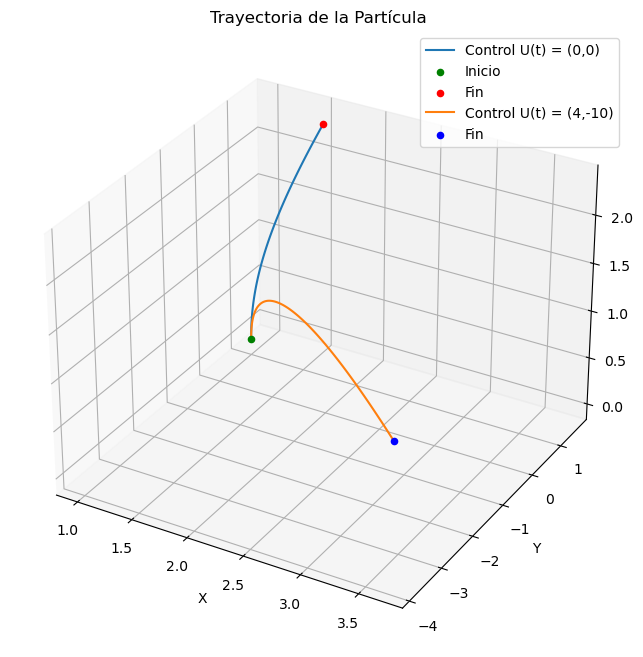

In [9]:
# Crear una figura 3D para trazar las trayectorias
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Resolver la ecuación diferencial para control U_0
X_U0 = Euler(X_0, U_0, t_f)

# Resolver la ecuación diferencial para control U_cte
X_Ucte = Euler(X_0, U_cte, t_f)

# Grafica trayectoria de la solución

ax.plot(X_U0[0, :], X_U0[1, :], X_U0[4, :], label='Control U(t) = (0,0)') # (x(t),y(t),z(t))
ax.scatter(X_U0[0, 0], X_U0[1, 0], X_U0[4, 0], color='green', label='Inicio') # Tiempo inicial
ax.scatter(X_U0[0, -1], X_U0[1, -1], X_U0[4, -1], color='red', label='Fin') # Tiempo final

ax.plot(X_Ucte[0, :], X_Ucte[1, :], X_Ucte[4, :], label='Control U(t) = (4,-10)') # (x(t),y(t),z(t))
ax.scatter(X_Ucte[0, -1], X_Ucte[1, -1], X_Ucte[4, -1], color='blue', label='Fin') # Tiempo final

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria de la Partícula')
ax.legend()
plt.show()

### Pregunta 5

Trayectoria en tiempo final: [-4.45147770e-07  1.13798530e-06 -8.79612615e-07]


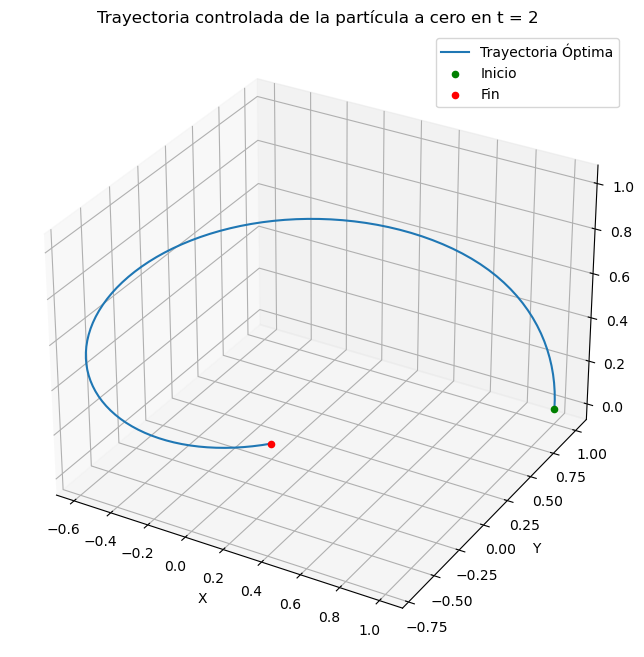

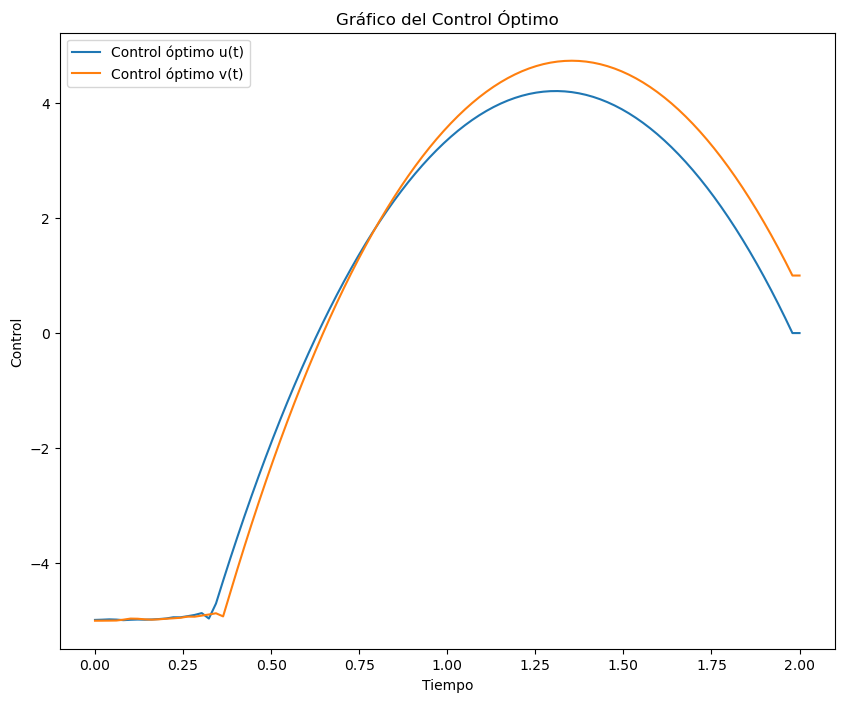

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # (x, y, v_x, v_y, z)

# Discretización del tiempo
N = 100
t_f = 2
t = np.linspace(0, t_f, N)

#Función Euler para control de tipo Array, necesario para la optimización, recibe un control U = (u,v) discretizado como array de tamaño 2N
def EulerD(X_0, U, t_f):
    # Condiciones iniciales
    u = U[:N]
    v = U[N:]
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i])  + np.dot(B,(u[i],v[i])))
    return X

# Función objetivo a minimizar a tiempo final es la distancia, esperamos un control que haga la distancia al origen cero
def objective_function(U):
    X = EulerD(X_0, U, t_f) # Solución de la EDO
    X_tf = X[:, -1] #Solución en tiempo final
    distance = np.linalg.norm(X_tf[[0, 1, 4]])  # Distancia hacia el origen
    return distance

# Elegimos iteración inicial para minimización con controles constantes u(t) = 0 y v(t) = 1
initial_u = np.zeros(N)
initial_v = np.ones(N)
initial_guess = np.concatenate((initial_u, initial_v))

# Definir límites de restricción para u y v
lower_bound = -5.0
upper_bound = 5.0
linear_constraint = LinearConstraint(np.identity(2 * N), lower_bound, upper_bound)

# Resolver el problema de optimización para encontrar el control que minimiza la distancia
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=[linear_constraint])
optimal_control = result.x
optimal_control_guess = optimal_control
# Resolver la ecuación diferencial con el control óptimo
X_optimal = EulerD(X_0, optimal_control, t_f)
X_tf = X_optimal[:,-1]
print('Trayectoria en tiempo final:', X_tf[[0,1,4]])

# Crear una figura 3D para trazar la trayectoria y el control óptimo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria
plot_trajectory(ax, X_optimal, 'Trayectoria Óptima')

# Configurar el aspecto de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria controlada de la partícula a cero en t = 2')
ax.legend()

# Graficar el control óptimo
fig = plt.figure(figsize=(10, 8))
plt.plot(t, optimal_control[:N] , label='Control óptimo u(t)')
plt.plot(t, optimal_control[N:] , label='Control óptimo v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.legend()
plt.title('Gráfico del Control Óptimo')
plt.show()

**Comentario:** Encontramos un control que lleva al partícula a cero en tiempo $t_f = 2$

Trayectoria en tiempo final: [-0.21823545 -0.21220202  0.5201669 ]


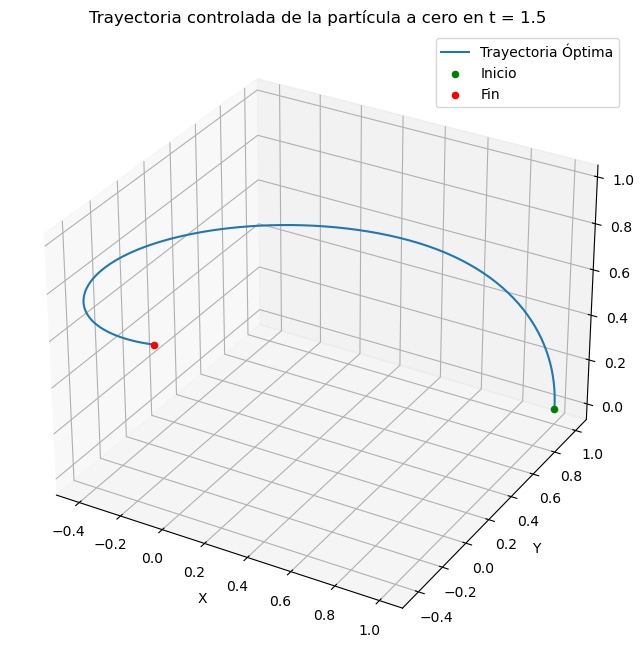

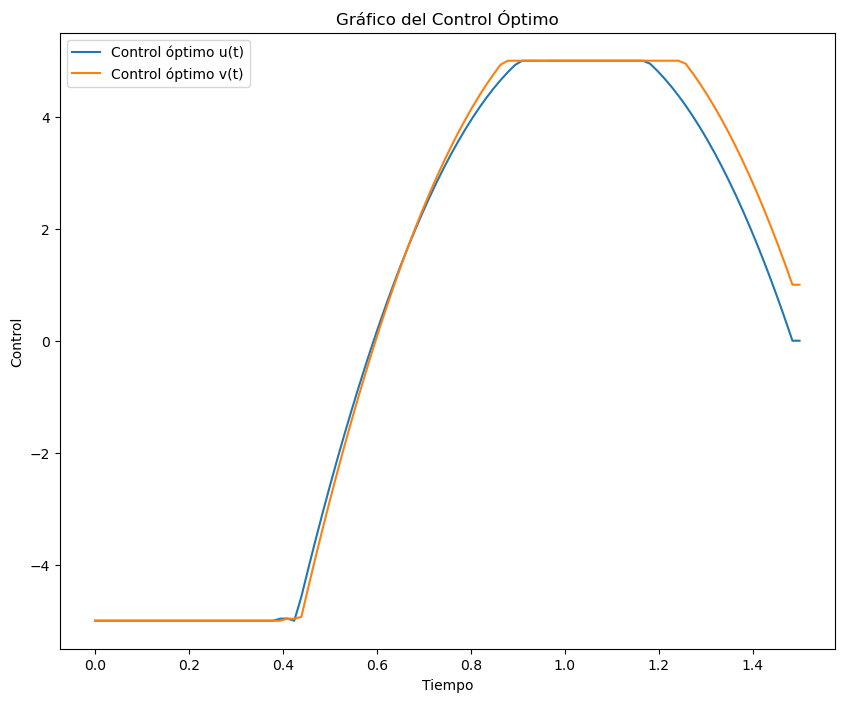

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # (x, y, v_x, v_y, z)

# Discretización del tiempo
N = 100
t_f = 1.5
t = np.linspace(0, t_f, N)

#Función Euler para control de tipo Array, necesario para la optimización, recibe un control U = (u,v) discretizado como array de tamaño 2N
def EulerD(X_0, U, t_f):
    # Condiciones iniciales
    u = U[:N]
    v = U[N:]
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i])  + np.dot(B,(u[i],v[i])))
    return X

# Función objetivo a minimizar a tiempo final es la distancia, esperamos un control que haga la distancia al origen cero
def objective_function(U):
    X = EulerD(X_0, U, t_f) # Solución de la EDO
    X_tf = X[:, -1] #Solución en tiempo final
    distance = np.linalg.norm(X_tf[[0, 1, 4]])  # Distancia hacia el origen
    return distance

# Elegimos iteración inicial para minimización con controles constantes u(t) = 0 y v(t) = 1
initial_u = np.zeros(N)
initial_v = np.ones(N)
initial_guess = np.concatenate((initial_u, initial_v))

# Definir límites de restricción para u y v
lower_bound = -5.0
upper_bound = 5.0
linear_constraint = LinearConstraint(np.identity(2 * N), lower_bound, upper_bound)

# Resolver el problema de optimización para encontrar el control que minimiza la distancia
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=[linear_constraint])
optimal_control = result.x

# Resolver la ecuación diferencial con el control óptimo
X_optimal = EulerD(X_0, optimal_control, t_f)
X_tf = X_optimal[:,-1]
print('Trayectoria en tiempo final:', X_tf[[0,1,4]])

# Crear una figura 3D para trazar la trayectoria y el control óptimo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria
plot_trajectory(ax, X_optimal, 'Trayectoria Óptima')

# Configurar el aspecto de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria controlada de la partícula a cero en t = 1.5')
ax.legend()

# Graficar el control óptimo
fig = plt.figure(figsize=(10, 8))
plt.plot(t, optimal_control[:N] , label='Control óptimo u(t)')
plt.plot(t, optimal_control[N:] , label='Control óptimo v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.legend()
plt.title('Gráfico del Control Óptimo')
plt.show()

**Comentario:** Se verifica que para $t \leq 1.5$ no se logra encontrar un control que lleve la partícula a cero, esperamos que el control óptimo lleve la partícula en un tiempo óptimo $t_f \in [1.5,2]$

### Pregunta 6

**Iteración Inicial: N = 100, u(t) = -5, v(t) = -5, $t_f = 0.8$**

Tiempo óptimo t_f = 1.8129337913154038
Estado de la ecuación en tiempo t_f = [1.29149277e-06 1.26330008e-06 2.60658078e-06]


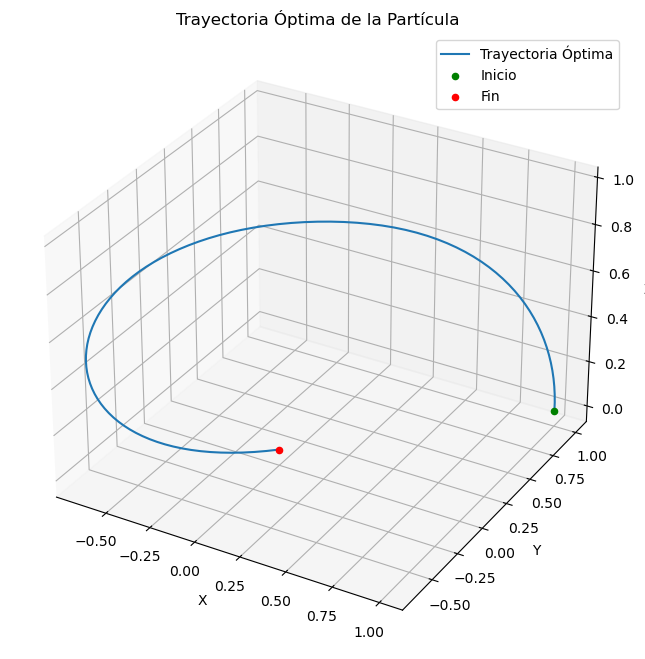

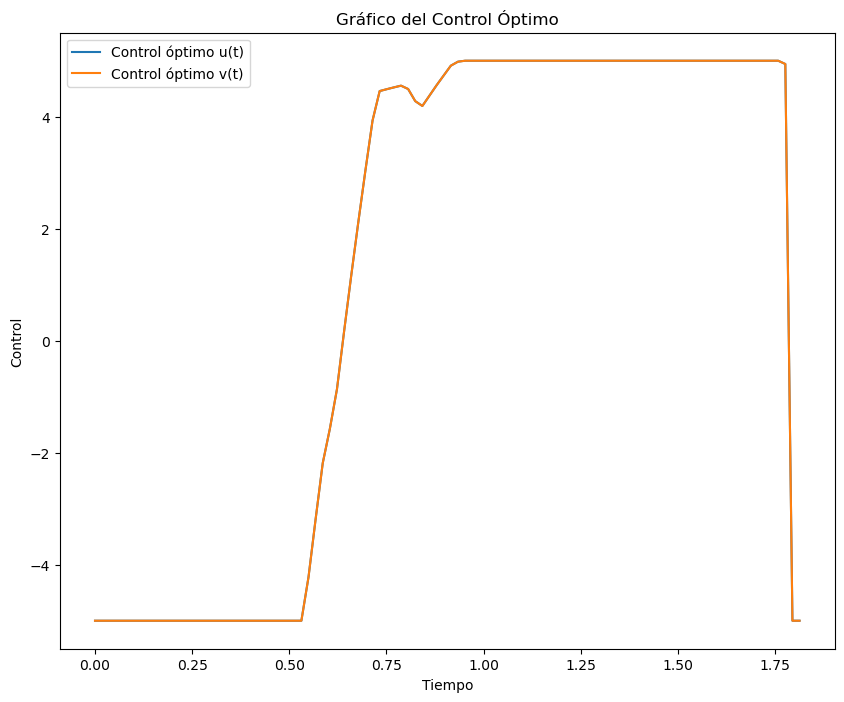

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # (x, y, v_x, v_y, z)

# Discretización del tiempo
N = 100

#Función Euler para control de tipo Array, necesario para la optimización, recibe un control U = (u,v) discretizado como array de tamaño 2N
def EulerD(X_0, U, t_f):
    # Condiciones iniciales
    u = U[:N]
    v = U[N:]
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i])  + np.dot(B,(u[i],v[i])))
    return X

# Definimos función que toma un U y X_O y entrega X(t_f)
def EulerTf(X_0, U):
    U_c = U[:2*N]
    t_f = U[-1]
    X = EulerD(X_0, U_c, t_f) # Solución de la EDO
    X_tf = X[:, -1] #Solución en tiempo final
    return X_tf[[0, 1, 4]]

# Función objetivo a minimizar es el tiempo final, esperamos un control que haga la distancia al origen cero en tiempo mínimo

def objective_function(U):
    t_f = U[-1]
    return t_f

# Elegimos iteración inicial para minimización con controles constantes u(t) = 0 y v(t) = 1 y t_f = 1
initial_u = -5.0*np.ones(N) # u(t) = -5
initial_v = -5.0*np.ones(N) #v(t) = -5
initial_tf = np.array([0.8])
initial_guess = np.concatenate((initial_u, initial_v, initial_tf))

# Definir límites de restricción para u , v en [-5,5] y t_f en [0, +inf]
lower_bound = -5.0*np.ones(2*N +1)
lower_bound[-1] = 0.001
upper_bound = 5.0*np.ones(2*N +1)
upper_bound[-1] = np.inf
linear_constraint = LinearConstraint(np.identity(2 * N + 1), lower_bound, upper_bound)

# Definimos restricción de llegar a cero en tiempo final
constraint_tf = ({'type': 'eq', 'fun': lambda U: EulerTf(X_0, U) - np.array([0,0,0])}) # Llegar a (0,0,0) en tiempo final

# Resolver el problema de optimización para encontrar el control que minimiza la distancia
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=[linear_constraint, constraint_tf])
optimal_control_tf = result.x
optimal_control = optimal_control_tf[:2*N]
optimal_tf = optimal_control_tf[-1]
print('Tiempo óptimo t_f =', optimal_tf)

# Resolver la ecuación diferencial con el control óptimo
X_optimal = EulerD(X_0, optimal_control, optimal_tf)
print('Estado de la ecuación en tiempo t_f =', EulerTf(X_0, optimal_control_tf))

# Crear una figura 3D para trazar la trayectoria y el control óptimo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, optimal_tf, N)

# Graficar la trayectoria
plot_trajectory(ax, X_optimal, 'Trayectoria Óptima')

# Configurar el aspecto de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria Óptima de la Partícula')
ax.legend()

# Graficar el control óptimo
fig = plt.figure(figsize=(10, 8))
plt.plot(t, optimal_control[:N] , label='Control óptimo u(t)')
plt.plot(t, optimal_control[N:] , label='Control óptimo v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.legend()
plt.title('Gráfico del Control Óptimo')
plt.show()

**Comentario:** La inicialización $N = 100$, $u(t) = -5$, $v(t) = -5$, $t_f = 0.8$ entrega un par $(\bar{u}(\cdot), \bar{v}(\cdot), t_f)$ factible para el problema de tiempo mínimo, llevando la partícula a cero en tiempo $t_f \approx 1.81$

**Iteración Inicial: N = 150, u(t) = 0, v(t) = 1, $t_f = 3.5$**

Tiempo óptimo t_f = 0.3450232089461417
Estado de la ecuación en tiempo t_f = [0.76124529 0.7612395  0.63607615]


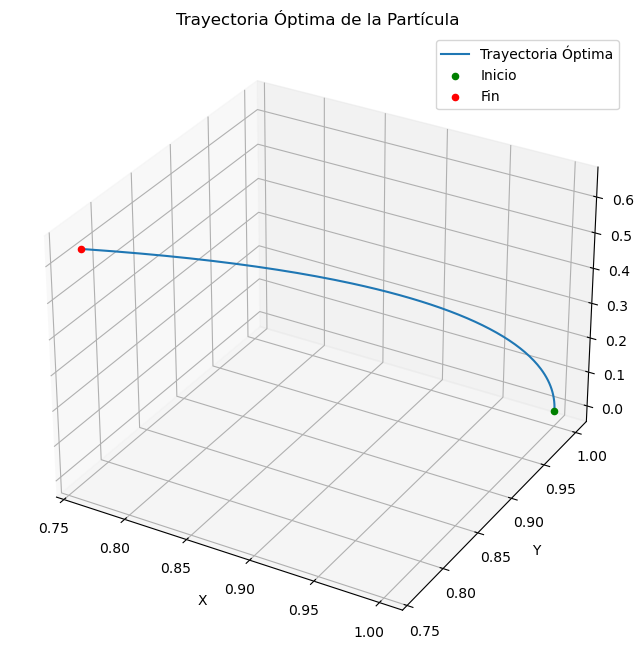

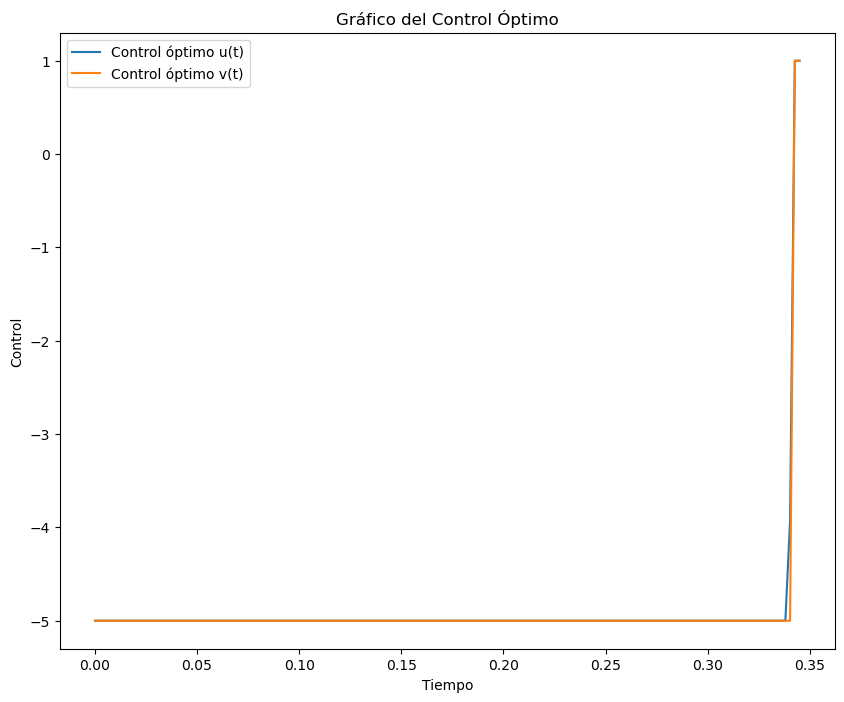

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # (x, y, v_x, v_y, z)

# Discretización del tiempo
N = 150

#Función Euler para control de tipo Array, necesario para la optimización, recibe un control U = (u,v) discretizado como array de tamaño 2N
def EulerD(X_0, U, t_f):
    # Condiciones iniciales
    u = U[:N]
    v = U[N:]
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i])  + np.dot(B,(u[i],v[i])))
    return X

def EulerTf(X_0, U):
    U_c = U[:2*N]
    t_f = U[-1]
    X = EulerD(X_0, U_c, t_f) # Solución de la EDO
    X_tf = X[:, -1] #Solución en tiempo final
    return X_tf[[0, 1, 4]]

# Función objetivo a minimizar es el tiempo final, esperamos un control que haga la distancia al origen cero en tiempo mínimo

def objective_function(U):
    t_f = U[-1]
    return t_f

# Elegimos iteración inicial para minimización con controles constantes u(t) = 0 y v(t) = 1 y t_f = 3.5
initial_u = np.ones(N)
initial_v = np.ones(N)
initial_tf = np.array([3.5])
initial_guess = np.concatenate((initial_u, initial_v, initial_tf))

# Definir límites de restricción para u , v en [-5,5] y t_f en [0, +inf]
lower_bound = -5.0*np.ones(2*N +1)
lower_bound[-1] = 0
upper_bound = 5.0*np.ones(2*N +1)
upper_bound[-1] = np.inf
linear_constraint = LinearConstraint(np.identity(2 * N + 1), lower_bound, upper_bound)

# Definimos restricción de llegar a cero en tiempo final
constraint_tf = ({'type': 'eq', 'fun': lambda U: EulerTf(X_0, U) - np.array([0,0,0])}) # Llegar a (0,0,0) en tiempo final

# Resolver el problema de optimización para encontrar el control que minimiza la distancia
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=[linear_constraint, constraint_tf])
optimal_control_tf = result.x
optimal_control = optimal_control_tf[:2*N]
optimal_tf = optimal_control_tf[-1]
print('Tiempo óptimo t_f =', optimal_tf)

# Resolver la ecuación diferencial con el control óptimo
X_optimal = EulerD(X_0, optimal_control, optimal_tf)
print('Estado de la ecuación en tiempo t_f =', EulerTf(X_0, optimal_control_tf))

# Crear una figura 3D para trazar la trayectoria y el control óptimo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, optimal_tf, N)

# Graficar la trayectoria
plot_trajectory(ax, X_optimal, 'Trayectoria Óptima')

# Configurar el aspecto de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria Óptima de la Partícula')
ax.legend()

# Graficar el control óptimo
fig = plt.figure(figsize=(10, 8))
plt.plot(t, optimal_control[:N] , label='Control óptimo u(t)')
plt.plot(t, optimal_control[N:] , label='Control óptimo v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.legend()
plt.title('Gráfico del Control Óptimo')
plt.show()

**Comentario:** La configuración anterior entrega un par $(\bar{u}(\cdot), \bar{v}(\cdot), t_f)$ infactible para el problema de tiempo mínimo, pues no lleva la partícula a cero

**Iteración inicial: N = 100, $u(t) = \bar{u}(t)$, $v(t) = \bar{v}(t)$, $t_f = 2$** donde $\bar{u}(t)$ y $\bar{v}(t)$ son los controles encontrados en el Ejercicio 5 para llevar la partícula a cero en tiempo $t_f = 2$

Usando esta inicialización, nos aseguramos de que el algoritmo comience a iterar con un par $(\bar{u}(\cdot), \bar{v}(\cdot), t_f)$ factible del problema de tiempo mínimo.

Tiempo óptimo t_f = 1.8271318930060751
Estado de la ecuación en tiempo t_f = [1.35402664e-08 1.28911192e-08 2.88104173e-08]


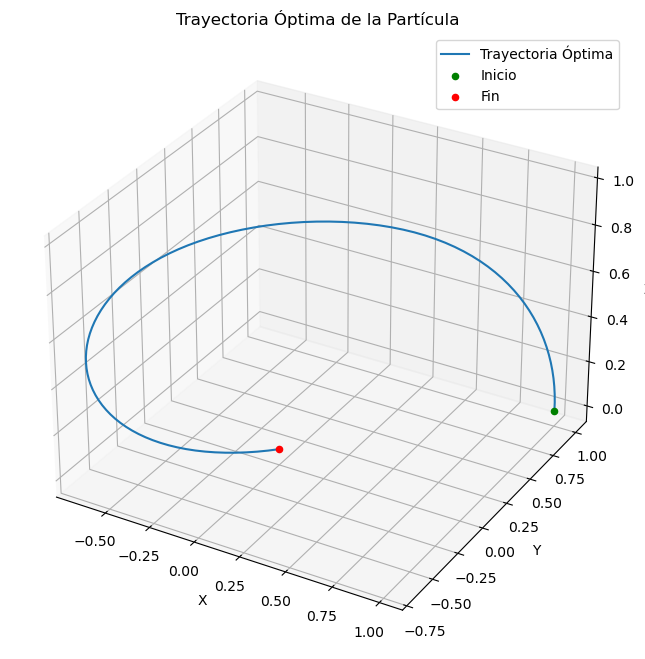

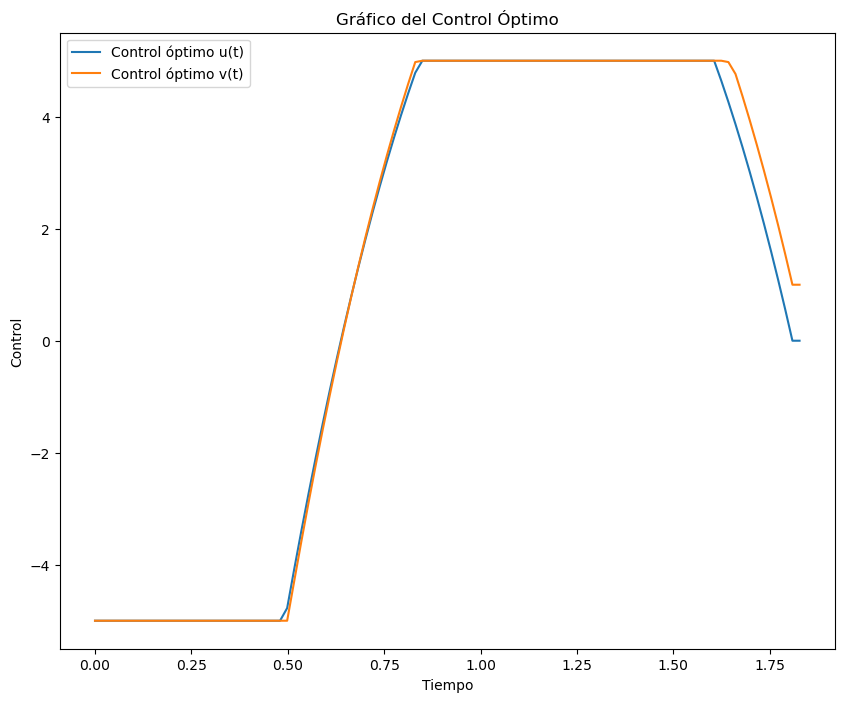

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # (x, y, v_x, v_y, z)

# Discretización del tiempo
N = 100

#Función Euler para control de tipo Array, necesario para la optimización, recibe un control U = (u,v) discretizado como array de tamaño 2N
def EulerD(X_0, U, t_f):
    # Condiciones iniciales
    u = U[:N]
    v = U[N:]
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i])  + np.dot(B,(u[i],v[i])))
    return X

def EulerTf(X_0, U):
    U_c = U[:2*N]
    t_f = U[-1]
    X = EulerD(X_0, U_c, t_f) # Solución de la EDO
    X_tf = X[:, -1] #Solución en tiempo final
    return X_tf[[0, 1, 4]]

# Función objetivo a minimizar es el tiempo final, esperamos un control que haga la distancia al origen cero en tiempo mínimo

def objective_function(U):
    t_f = U[-1]
    return t_f

# Elegimos iteración inicial para minimización con controles constantes u(t) = 0 y v(t) = 1 y t_f = 1
initial_tf = np.array([2])
initial_guess = np.concatenate((optimal_control_guess, initial_tf))

# Definir límites de restricción para u , v en [-5,5] y t_f en [0, +inf]
lower_bound = -5.0*np.ones(2*N +1)
lower_bound[-1] = 0.001
upper_bound = 5.0*np.ones(2*N +1)
upper_bound[-1] = np.inf
linear_constraint = LinearConstraint(np.identity(2 * N + 1), lower_bound, upper_bound)

# Definimos restricción de llegar a cero en tiempo final
constraint_tf = ({'type': 'eq', 'fun': lambda U: EulerTf(X_0, U) - np.array([0,0,0])}) # Llegar a (0,0,0) en tiempo final

# Resolver el problema de optimización para encontrar el control que minimiza la distancia
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=[linear_constraint, constraint_tf])
optimal_control_tf = result.x
optimal_control = optimal_control_tf[:2*N]
optimal_tf = optimal_control_tf[-1]
print('Tiempo óptimo t_f =', optimal_tf)

# Resolver la ecuación diferencial con el control óptimo
X_optimal = EulerD(X_0, optimal_control, optimal_tf)
print('Estado de la ecuación en tiempo t_f =', EulerTf(X_0, optimal_control_tf))

# Crear una figura 3D para trazar la trayectoria y el control óptimo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, optimal_tf, N)

# Graficar la trayectoria
plot_trajectory(ax, X_optimal, 'Trayectoria Óptima')

# Configurar el aspecto de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria Óptima de la Partícula')
ax.legend()

# Graficar el control óptimo
fig = plt.figure(figsize=(10, 8))
plt.plot(t, optimal_control[:N] , label='Control óptimo u(t)')
plt.plot(t, optimal_control[N:] , label='Control óptimo v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.legend()
plt.title('Gráfico del Control Óptimo')
plt.show()

**Iteración Inicial: N = 200, u(t) = t, v(t) = -t, $t_f = 1$**

Tiempo óptimo t_f = 0.35901574520146906
Estado de la ecuación en tiempo t_f = [0.79570727 0.74081359 0.65874858]


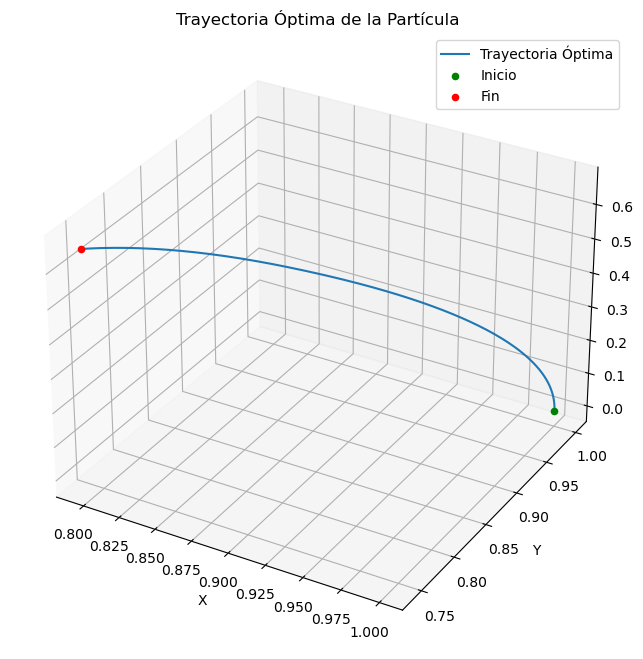

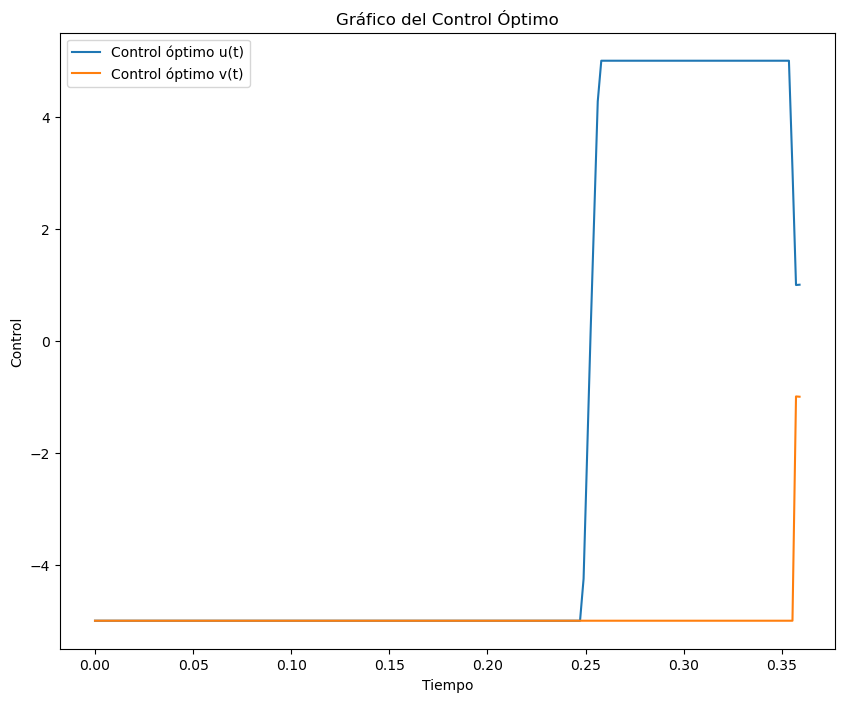

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

# Definir las matrices A y B
A = np.matrix([[0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 1, 0, 0, 0]])
B = np.matrix([[0, 0], [0, 0], [1, 0], [0, 1], [0, 0]])

# Condiciones iniciales
X_0 = np.array([1, 1, 0, 0, 0])  # (x, y, v_x, v_y, z)

# Discretización del tiempo
N = 200

#Función Euler para control de tipo Array, necesario para la optimización, recibe un control U = (u,v) discretizado como array de tamaño 2N
def EulerD(X_0, U, t_f):
    # Condiciones iniciales
    u = U[:N]
    v = U[N:]
    delta_t = t_f / (N - 1)
    X = np.zeros((5, N))
    X[:, 0] = X_0
    #Método de Euler
    for i in range(N - 1):
        X[:, i + 1] = X[:, i] + delta_t * (np.dot(A, X[:, i])  + np.dot(B,(u[i],v[i])))
    return X

def EulerTf(X_0, U):
    U_c = U[:2*N]
    t_f = U[-1]
    X = EulerD(X_0, U_c, t_f) # Solución de la EDO
    X_tf = X[:, -1] #Solución en tiempo final
    return X_tf[[0, 1, 4]]

# Función objetivo a minimizar es el tiempo final, esperamos un control que haga la distancia al origen cero en tiempo mínimo

def objective_function(U):
    t_f = U[-1]
    return t_f

# Elegimos iteración inicial para minimización con controles constantes u(t) = 0 y v(t) = 1 y t_f = 1
initial_u = np.linspace(0, 1, N) # u(t) = t
initial_v = -1*np.linspace(0, 1, N) #v(t) = -t
initial_tf = np.array([1])
initial_guess = np.concatenate((initial_u, initial_v, initial_tf))

# Definir límites de restricción para u , v en [-5,5] y t_f en [0, +inf]
lower_bound = -5.0*np.ones(2*N +1)
lower_bound[-1] = 0.001
upper_bound = 5.0*np.ones(2*N +1)
upper_bound[-1] = np.inf
linear_constraint = LinearConstraint(np.identity(2 * N + 1), lower_bound, upper_bound)

# Definimos restricción de llegar a cero en tiempo final
constraint_tf = ({'type': 'eq', 'fun': lambda U: EulerTf(X_0, U) - np.array([0,0,0])}) # Llegar a (0,0,0) en tiempo final

# Resolver el problema de optimización para encontrar el control que minimiza la distancia
result = minimize(objective_function, initial_guess, method='SLSQP', constraints=[linear_constraint, constraint_tf])
optimal_control_tf = result.x
optimal_control = optimal_control_tf[:2*N]
optimal_tf = optimal_control_tf[-1]
print('Tiempo óptimo t_f =', optimal_tf)

# Resolver la ecuación diferencial con el control óptimo
X_optimal = EulerD(X_0, optimal_control, optimal_tf)
print('Estado de la ecuación en tiempo t_f =', EulerTf(X_0, optimal_control_tf))

# Crear una figura 3D para trazar la trayectoria y el control óptimo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, optimal_tf, N)

# Graficar la trayectoria
plot_trajectory(ax, X_optimal, 'Trayectoria Óptima')

# Configurar el aspecto de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria Óptima de la Partícula')
ax.legend()

# Graficar el control óptimo
fig = plt.figure(figsize=(10, 8))
plt.plot(t, optimal_control[:N] , label='Control óptimo u(t)')
plt.plot(t, optimal_control[N:] , label='Control óptimo v(t)')
plt.xlabel('Tiempo')
plt.ylabel('Control')
plt.legend()
plt.title('Gráfico del Control Óptimo')
plt.show()